In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [22]:
y_opt=11.27

### Import BO benchmark Runs

In [23]:
df = pd.read_excel("./BO_benckmark_LHS16_20220916.xls")
df_BO_reg = df.iloc[:,1:]
df_BO_reg

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.210456,1.548105,3.339761,9.563540,1.017510,9.843168,8.459015,0.693092,8.443250,0.602901,...,0.972627,9.265682,0.996546,8.920719,0.882778,8.756490,0.939460,8.458418,8.460576,9.456368
1,8.721825,2.858000,0.883312,9.041349,0.500000,2.929010,9.104445,3.448928,3.405207,8.824670,...,0.889770,3.444431,0.500000,7.718377,0.500000,5.611552,9.803279,9.181870,0.500000,8.741457
2,6.009030,8.109463,8.449375,3.136179,9.464702,3.909224,0.853622,1.766838,3.176125,3.321847,...,0.500000,3.295081,0.500000,9.061918,8.043343,9.409170,4.026911,0.984498,0.692942,3.374170
3,8.025491,8.461412,3.513195,0.691292,3.339043,0.500000,0.757142,8.452073,0.500000,6.962242,...,9.289841,8.398286,9.341209,0.607764,1.203638,8.240855,8.626891,3.505037,0.500000,0.500000
4,5.965361,6.291240,4.621115,9.812874,1.464777,0.500000,7.209742,9.818192,3.408861,9.289218,...,0.886689,3.660203,10.158265,6.742144,7.843011,8.444076,1.057998,0.935417,3.285456,2.035237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,10.957504,11.076858,10.190434,10.831310,10.831310,10.486025,10.956667,9.845853,10.973670,10.647760,...,10.324372,10.878067,10.483432,10.325867,10.323770,9.363471,10.327041,11.080500,10.995933,10.999333
124,10.912517,10.983208,10.157389,10.818113,10.842360,10.325050,11.069383,9.801082,10.939492,10.735775,...,10.760377,10.886300,10.940250,10.327850,10.886300,10.970308,10.813260,10.971167,11.050600,11.134933
125,10.791960,11.034308,10.222511,10.815713,10.818113,10.484682,10.891283,10.972475,10.963667,10.789027,...,11.192433,10.920750,10.483532,10.822682,9.814441,10.997417,10.805227,10.487065,10.973058,11.122858
126,10.912560,11.002683,10.101551,10.813513,10.813513,10.325250,10.933652,10.971254,10.997879,10.131235,...,10.270945,10.224820,10.005496,10.888087,11.242033,9.817405,10.483897,10.956667,10.794547,11.009200


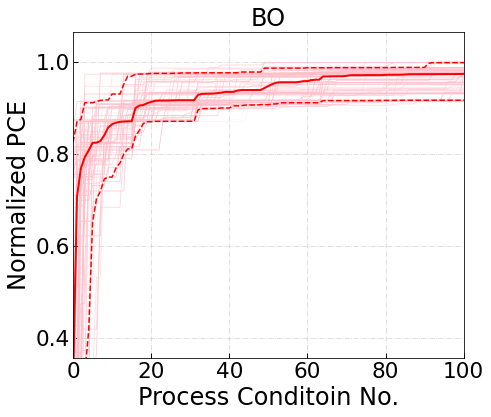

In [24]:
BO_list = np.transpose(df_BO_reg.values)
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
eff_max_runlist = []
for df_i in BO_list:
    eff_max_acc = np.maximum.accumulate(df_i)
    eff_acc = df_i
    i = i +1
    ax.plot(range(len(eff_max_acc)),eff_max_acc/y_opt, 
            alpha = 0.8*i/len(BO_list)+0.4, c = 'pink',
            linewidth=0.75)
    eff_max_runlist.append(eff_max_acc/y_opt)
#plt.scatter(range(len(eff_max_acc)),eff_acc)
line_95perc = np.percentile(eff_max_runlist, 95, axis = 0)
line_median = np.percentile(eff_max_runlist, 50, axis = 0)
line_5perc = np.percentile(eff_max_runlist, 5, axis = 0)
line_mean = np.mean(eff_max_runlist, axis = 0)

ax.plot(line_95perc,'--', c = 'red', linewidth=1.5)
ax.plot(line_median,'-', c = 'red', linewidth=2)
ax.plot(line_5perc,'--', c = 'red', linewidth=1.5)

#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(4/y_opt,12/y_opt)
axes.set_xlim(0,100)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Normalized PCE', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
axes.set_title('BO', fontsize = fs)
plt.show()

BO_reg_5perc, BO_reg_50perc, BO_reg_95perc, BO_reg_mean = [line_5perc, line_median, line_95perc, line_mean]

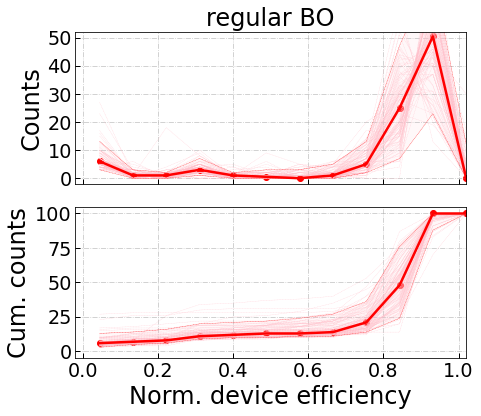

In [50]:
eff_seq_list = BO_list
cum_list = []
cnt_list = []
effmax_seq_list = []
eff_bins =  np.arange(19)
for seq_i in np.arange(len(eff_seq_list)):
    eff_seq= eff_seq_list[seq_i][:100]
    effmax_seq = np.maximum.accumulate(eff_seq)

    eff_sorted = np.sort(eff_seq)
    cnts, bins = np.histogram(eff_sorted, bins=eff_bins)
    cum_cnts = np.cumsum(cnts)
    x = bins[:-1]+0.5
    y_cnt = cnts#/cum_cnts[-1]
    y_cum = cum_cnts#/cum_cnts[-1]
    cnt_list.append(y_cnt)
    cum_list.append(y_cum)
    effmax_seq_list.append(effmax_seq)
    
effmax_seq_95perc = np.quantile(effmax_seq_list, 0.95, axis = 0)
effmax_seq_5perc = np.quantile(effmax_seq_list, 0.05, axis = 0)
effmax_seq_median = np.median(effmax_seq_list, axis = 0)

distr_95perc = np.quantile(cnt_list, 0.95, axis = 0)
distr_5perc = np.quantile(cnt_list, 0.05, axis = 0)
distr_median= np.median(cnt_list, axis = 0)

cum_distr_95perc = np.quantile(cum_list, 0.95, axis = 0)
cum_distr_5perc = np.quantile(cum_list, 0.05, axis = 0)
cum_distr_median = np.median(cum_list, axis = 0)

BO_hist100_5perc, BO_hist100_50perc, BO_hist100_95perc= [distr_5perc, distr_median, distr_95perc]
BO_cum100_5perc, BO_cum100_50perc, BO_cum100_95perc= [cum_distr_5perc, cum_distr_median, cum_distr_95perc]

x_norm = x/y_opt
fig,axes = plt.subplots(2, 1, figsize=(7, 5*1.2), sharex = True)
fs = 24
ax = axes[0]
for cnt_i in cnt_list:
    ax.plot(x_norm, cnt_i, '--', linewidth = 0.3, alpha = 1*i/len(cnt_list)+0.9, color = 'pink') 

ax.plot(x_norm, distr_median, '-', color = 'red', linewidth = 2.5, label = 'reg. BO') 
ax.scatter(x_norm, distr_median, color = 'red') 
ax.plot(x_norm, distr_95perc, '--', color = 'red', linewidth = 0.3) 
ax.plot(x_norm, distr_5perc, '--', color = 'red', linewidth = 0.3) 
ax.fill_between(x_norm, distr_5perc, distr_95perc, alpha = 0.1, color = 'pink')
#ax.plot(np.ones(100)*0.95, np.linspace(0,51,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Counts', fontsize = fs)
ax.set_ylim(-0.02*100, 0.52*100)
ax.set_yticks(np.arange(6)*10)
ax.set_xlim(-0.02, 1.02)
ax.set_title('regular BO', fontsize = fs)

ax = axes[1]
for cum_i in  cum_list:
    ax.plot(x_norm, cum_i, '--', linewidth = 0.3, alpha = 1*i/len(cum_list)+0.9, color = 'pink') 

ax.plot(x_norm, cum_distr_median, '-', color = 'red', linewidth = 2.5, label = 'reg. BO')
ax.scatter(x_norm, cum_distr_median, color = 'red') 
ax.plot(x_norm, cum_distr_95perc, '--', color = 'red', linewidth = 0.3) 
ax.plot(x_norm, cum_distr_5perc, '--', color = 'red', linewidth = 0.3) 
ax.fill_between(x_norm, cum_distr_5perc, cum_distr_95perc, alpha = 0.1, color = 'pink')
#ax.plot(np.ones(100)*15/norm_factor, np.linspace(0, 2,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Cum. counts', fontsize = fs)
ax.set_xlabel('Norm. device efficiency', fontsize = fs)
ax.set_yticks(np.arange(6)*25)
ax.set_ylim(-0.05*100, 1.05*100)
ax.set_xlim(-0.02, 1.02)
#ax.legend(bbox_to_anchor=(0.08, 1.2, 0.5, 0.9), fontsize = fs*0.8)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.7)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.15)
plt.show()

### Import LHS Benchmark Runs

In [26]:
df = pd.read_excel("./benckmark_LHS16_20220916.xls")
df_LHS_full = df.iloc[:,1:]
df_LHS_full

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.396497,2.899301,3.313376,8.886831,6.690422,0.500000,3.386028,6.947331,0.609316,8.309350,...,0.877522,1.913685,0.876032,10.330000,9.192444,7.764272,0.884437,3.509184,0.935406,0.888487
1,2.918711,9.807400,0.712681,9.388725,3.403810,3.329070,0.500000,9.818074,0.500000,0.999329,...,2.326706,9.811632,5.173751,0.948401,3.471963,0.875639,7.050371,5.447034,6.114015,0.500000
2,9.819504,8.788401,3.348538,9.438137,3.915195,4.536499,3.336731,10.201555,7.731365,0.655529,...,9.260715,3.690147,0.931478,3.384165,8.587032,10.090704,1.144007,0.906212,0.870469,9.196408
3,5.508067,3.343592,3.370393,0.500000,3.568438,3.399825,3.420163,0.995598,3.452930,0.500000,...,6.053340,1.145320,8.606422,1.351858,4.394026,8.453307,0.883606,0.500000,0.959246,3.439659
4,3.400808,2.616326,3.373346,0.533198,0.813174,0.500000,0.500000,8.470650,3.432682,0.500000,...,8.458079,4.166060,0.660881,5.171524,9.239456,0.500000,4.828769,9.422267,9.812580,10.136787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,4.410200,8.154299,9.495949,0.795279,0.636922,4.646825,8.729714,0.713379,8.676992,0.771508,...,8.397533,4.112428,0.948213,9.193677,8.958095,8.358036,2.749625,2.320061,9.285908,9.808124
108,9.179780,3.334613,0.500000,0.500000,1.546935,3.386996,8.230415,0.882642,0.753362,10.297577,...,8.459370,3.651378,8.454799,3.402975,4.919899,0.500000,3.344381,3.670131,7.822395,9.285403
109,3.434712,8.576459,3.403695,3.336432,0.887899,1.329690,7.626615,9.944734,0.910127,9.180422,...,7.594730,8.499608,10.226057,0.500000,0.884630,9.192155,6.320801,0.886799,7.928250,0.500000
110,3.373743,3.435069,3.360446,9.227328,0.775697,0.924260,4.771004,9.211079,3.505967,7.242031,...,0.885864,0.865607,9.265804,9.477797,3.391817,0.884013,3.321998,3.396321,0.500000,4.715706


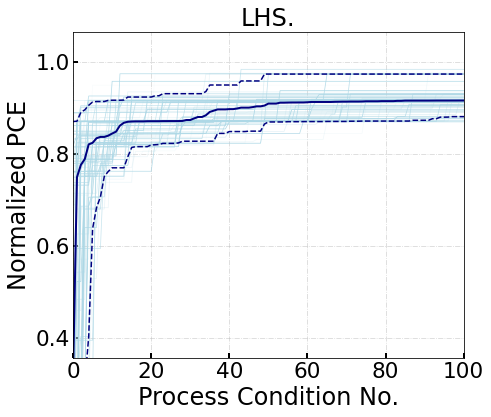

In [27]:
LHS_list = np.transpose(df_LHS_full.values)
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
eff_max_runlist = []
for df_i in LHS_list:
    eff_max_acc = np.maximum.accumulate(df_i)
    eff_acc = df_i
    i = i +1
    ax.plot(range(len(eff_max_acc)),eff_max_acc/y_opt, alpha = 0.8*i/len(LHS_list)+0.6, c = 'lightblue', linewidth=0.75)
    eff_max_runlist.append(eff_max_acc/y_opt)
#plt.scatter(range(len(eff_max_acc)),eff_acc)
line_95perc = np.percentile(eff_max_runlist, 95, axis = 0)
line_median = np.percentile(eff_max_runlist, 50, axis = 0)
line_5perc = np.percentile(eff_max_runlist, 5, axis = 0)
line_mean = np.mean(eff_max_runlist, axis = 0)

ax.plot(line_95perc,'--', c = 'navy', linewidth=1.5)
ax.plot(line_median,'-', c = 'navy', linewidth=2)
ax.plot(line_5perc,'--', c = 'navy', linewidth=1.5)

#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(4/y_opt,12/y_opt)
axes.set_xlim(0,100)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Normalized PCE', fontsize = fs)
axes.set_xlabel('Process Condition No.', fontsize = fs)
axes.set_title('LHS.', fontsize = fs)
plt.show()

LHS_full_5perc, LHS_full_50perc, LHS_full_95perc, LHS_full_mean = [line_5perc, line_median, line_95perc, line_mean]

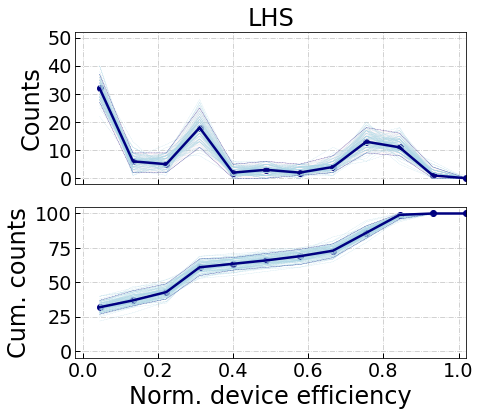

In [28]:
eff_seq_list = LHS_list
cum_list = []
cnt_list = []
effmax_seq_list = []
eff_bins =  np.arange(19)
for seq_i in np.arange(len(eff_seq_list)):
    eff_seq= eff_seq_list[seq_i][:100]
    effmax_seq = np.maximum.accumulate(eff_seq)

    eff_sorted = np.sort(eff_seq)
    cnts, bins = np.histogram(eff_sorted, bins=eff_bins)
    cum_cnts = np.cumsum(cnts)
    x = bins[:-1]+0.5
    y_cnt = cnts#/cum_cnts[-1]
    y_cum = cum_cnts#/cum_cnts[-1]
    cnt_list.append(y_cnt)
    cum_list.append(y_cum)
    effmax_seq_list.append(effmax_seq)
    
effmax_seq_95perc = np.quantile(effmax_seq_list, 0.95, axis = 0)
effmax_seq_5perc = np.quantile(effmax_seq_list, 0.05, axis = 0)
effmax_seq_median = np.median(effmax_seq_list, axis = 0)

distr_95perc = np.quantile(cnt_list, 0.95, axis = 0)
distr_5perc = np.quantile(cnt_list, 0.05, axis = 0)
distr_median= np.median(cnt_list, axis = 0)

cum_distr_95perc = np.quantile(cum_list, 0.95, axis = 0)
cum_distr_5perc = np.quantile(cum_list, 0.05, axis = 0)
cum_distr_median = np.median(cum_list, axis = 0)

LHS_hist100_5perc, LHS_hist100_50perc, LHS_hist100_95perc= [distr_5perc, distr_median, distr_95perc]
LHS_cum100_5perc, LHS_cum100_50perc, LHS_cum100_95perc= [cum_distr_5perc, cum_distr_median, cum_distr_95perc]

x_norm = x/y_opt
fig,axes = plt.subplots(2, 1, figsize=(7, 5*1.2), sharex = True)
fs = 24
ax = axes[0]
for cnt_i in cnt_list:
    ax.plot(x_norm, cnt_i, '--', linewidth = 0.3, alpha = 1*i/len(cnt_list)+0.9, color = 'lightblue') 

ax.plot(x_norm, distr_median, '-', color = 'navy', linewidth = 2.5, label = 'LHS') 
ax.scatter(x_norm, distr_median, color = 'navy') 
ax.plot(x_norm, distr_95perc, '--', color = 'navy', linewidth = 0.3) 
ax.plot(x_norm, distr_5perc, '--', color = 'navy', linewidth = 0.3) 
ax.fill_between(x_norm, distr_5perc, distr_95perc, alpha = 0.1, color = 'pink')
#ax.plot(np.ones(100)*0.95, np.linspace(0,51,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Counts', fontsize = fs)
ax.set_ylim(-0.02*100, 0.52*100)
ax.set_yticks(np.arange(6)*10)
ax.set_xlim(-0.02, 1.02)
ax.set_title('LHS', fontsize = fs)

ax = axes[1]
for cum_i in cum_list:
    ax.plot(x_norm, cum_i, '--', linewidth = 0.3, alpha = 1*i/len(cum_list)+0.9, color = 'lightblue') 

ax.plot(x_norm, cum_distr_median, '-', color = 'navy', linewidth = 2.5, label = 'LHS')
ax.scatter(x_norm, cum_distr_median, color = 'navy') 
ax.plot(x_norm, cum_distr_95perc, '--', color = 'navy', linewidth = 0.3) 
ax.plot(x_norm, cum_distr_5perc, '--', color = 'navy', linewidth = 0.3) 
ax.fill_between(x_norm, cum_distr_5perc, cum_distr_95perc, alpha = 0.1, color = 'lightblue')
#ax.plot(np.ones(100)*15/norm_factor, np.linspace(0, 2,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Cum. counts', fontsize = fs)
ax.set_xlabel('Norm. device efficiency', fontsize = fs)
ax.set_yticks(np.arange(6)*25)
ax.set_ylim(-0.05*100, 1.05*100)
ax.set_xlim(-0.02, 1.02)
#ax.legend(bbox_to_anchor=(0.08, 1.2, 0.5, 0.9), fontsize = fs*0.8)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.7)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.15)
plt.show()

### One Variable at a time

In [29]:
df = pd.read_excel("./benckmark_OVAT_20220921.xls")
df_OVAT_iter = df.iloc[:,1:]
df_OVAT_iter

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.55,9.20,0.50,8.27,0.50,7.84,3.48,0.50,2.21,7.90,...,0.50,3.84,0.50,0.73,0.88,0.50,1.75,0.51,0.87,0.50
1,1.94,9.21,0.50,8.68,0.50,8.54,4.29,0.50,2.78,7.35,...,0.50,7.84,0.50,3.41,0.89,0.50,8.77,0.51,3.44,0.50
2,0.50,9.24,1.05,8.89,0.61,8.71,4.22,0.53,5.76,7.85,...,0.50,8.57,0.50,3.47,3.40,0.50,9.49,0.51,3.45,0.50
3,3.38,9.81,2.72,8.89,0.71,8.74,5.72,0.71,7.05,6.07,...,0.50,8.67,0.50,3.64,4.32,0.50,9.27,0.51,1.16,0.50
4,0.50,9.30,3.42,8.96,0.89,9.20,5.23,0.58,7.82,7.75,...,0.50,8.75,0.50,7.79,5.22,0.50,9.20,0.50,0.89,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,10.97,1.64,8.78,7.75,8.89,9.81,9.20,9.87,9.81,10.82,...,1.09,7.75,8.45,10.76,3.51,1.56,1.25,7.95,9.28,8.89
97,11.09,8.98,9.18,8.78,8.45,10.33,10.96,10.29,10.33,10.48,...,8.78,8.78,8.08,10.80,9.64,8.46,9.20,3.77,10.49,7.95
98,10.91,10.89,9.19,9.18,5.11,10.97,10.48,10.81,10.97,9.30,...,10.94,9.18,3.55,10.35,10.78,10.79,10.48,3.37,11.07,3.77
99,10.35,10.26,9.33,9.19,3.39,11.20,10.13,11.14,11.20,9.18,...,10.26,9.19,3.39,9.91,10.11,10.27,10.13,0.99,10.93,3.37


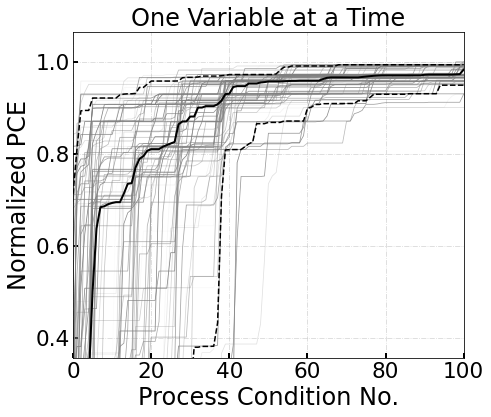

In [30]:
OVAT_list = np.transpose(df_OVAT_iter.values)
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
eff_max_runlist = []
for df_i in OVAT_list:
    eff_max_acc = np.maximum.accumulate(df_i)
    eff_acc = df_i
    i = i +1
    ax.plot(range(len(eff_max_acc)),eff_max_acc/y_opt, alpha = 1*i/len(OVAT_list)+0.9, c = 'grey', linewidth=0.75)
    eff_max_runlist.append(eff_max_acc/y_opt)
#plt.scatter(range(len(eff_max_acc)),eff_acc)
line_95perc = np.percentile(eff_max_runlist, 95, axis = 0)
line_median = np.percentile(eff_max_runlist, 50, axis = 0)
line_mean = np.mean(eff_max_runlist, axis = 0)
line_5perc = np.percentile(eff_max_runlist, 5, axis = 0)

ax.plot(line_95perc,'--', c = 'black', linewidth=1.5)
ax.plot(line_5perc,'--', c = 'black', linewidth=1.5)
ax.plot(line_median,'-', c = 'black', linewidth=2)

#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(4/y_opt,12/y_opt)
axes.set_xlim(0,100)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Normalized PCE', fontsize = fs)
axes.set_xlabel('Process Condition No.', fontsize = fs)
axes.set_title('One Variable at a Time', fontsize = fs)
plt.show()

OVAT_5perc, OVAT_50perc, OVAT_95perc, OVAT_mean= [line_5perc, line_median, line_95perc, line_mean]

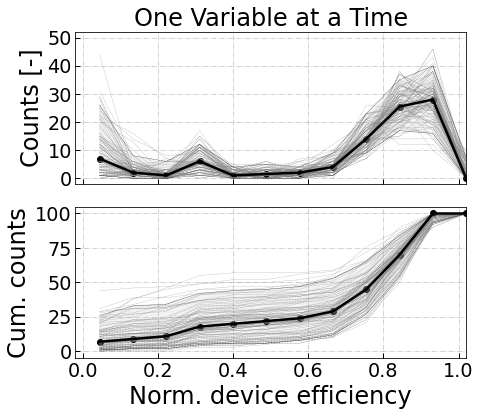

In [31]:
eff_seq_list = OVAT_list
cum_list = []
cnt_list = []
effmax_seq_list = []
eff_bins =  np.arange(19)
for seq_i in np.arange(len(eff_seq_list)):
    eff_seq= eff_seq_list[seq_i][:100]
    effmax_seq = np.maximum.accumulate(eff_seq)

    eff_sorted = np.sort(eff_seq)
    cnts, bins = np.histogram(eff_sorted, bins=eff_bins)
    cum_cnts = np.cumsum(cnts)
    x = bins[:-1]+0.5
    y_cnt = cnts#/cum_cnts[-1]
    y_cum = cum_cnts#/cum_cnts[-1]
    cnt_list.append(y_cnt)
    cum_list.append(y_cum)
    effmax_seq_list.append(effmax_seq)
    
effmax_seq_95perc = np.quantile(effmax_seq_list, 0.95, axis = 0)
effmax_seq_5perc = np.quantile(effmax_seq_list, 0.05, axis = 0)
effmax_seq_median = np.quantile(effmax_seq_list, 0.5, axis = 0)

distr_95perc = np.quantile(cnt_list, 0.95, axis = 0)
distr_5perc = np.quantile(cnt_list, 0.05, axis = 0)
distr_median= np.quantile(cnt_list, 0.5, axis = 0)
distr_mean= np.mean(cnt_list, axis = 0)

cum_distr_95perc = np.quantile(cum_list, 0.95, axis = 0)
cum_distr_5perc = np.quantile(cum_list, 0.05, axis = 0)
cum_distr_median = np.quantile(cum_list, 0.5, axis = 0)

OVAT_hist100_5perc, OVAT_hist100_50perc, OVAT_hist100_95perc= [distr_5perc, distr_median, distr_95perc]
OVAT_cum100_5perc, OVAT_cum100_50perc, OVAT_cum100_95perc= [cum_distr_5perc, cum_distr_median, cum_distr_95perc]

x_norm = x/y_opt
fig,axes = plt.subplots(2, 1, figsize=(7, 5*1.2), sharex = True)
fs = 24
ax = axes[0]
for cnt_i in cnt_list:
    ax.plot(x_norm, cnt_i, '--', linewidth = 0.3, alpha = 1*i/len(cnt_list)+0.9, color = 'grey') 

ax.plot(x_norm, distr_median, '-', color = 'black', linewidth = 2.5, label = 'OVAT') 
ax.scatter(x_norm, distr_median, color = 'black') 
ax.plot(x_norm, distr_95perc, '--', color = 'black', linewidth = 0.3) 
ax.plot(x_norm, distr_5perc, '--', color = 'black', linewidth = 0.3) 
ax.fill_between(x_norm, distr_5perc, distr_95perc, alpha = 0.1, color = 'grey')


#ax.plot(np.ones(100)*0.95, np.linspace(0,51,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Counts [-]', fontsize = fs)
ax.set_ylim(-0.02*100, 0.52*100)
ax.set_yticks(np.arange(6)*10)
ax.set_xlim(-0.02, 1.02)
ax.set_title('One Variable at a Time', fontsize = fs)

ax = axes[1]
for cum_i in cum_list:
    ax.plot(x_norm, cum_i, '--', linewidth = 0.3, alpha = 1*i/len(cum_list)+0.9, color = 'grey') 

ax.plot(x_norm, cum_distr_median, '-', color = 'black', linewidth = 2.5, label = 'OVAT')
ax.scatter(x_norm, cum_distr_median, color = 'black') 
ax.plot(x_norm, cum_distr_95perc, '--', color = 'black', linewidth = 0.3) 
ax.plot(x_norm, cum_distr_5perc, '--', color = 'black', linewidth = 0.3) 
ax.fill_between(x_norm, cum_distr_5perc, cum_distr_95perc, alpha = 0.1, color = 'grey')
#ax.plot(np.ones(100)*15/norm_factor, np.linspace(0, 2,100), color = 'blue', alpha = 0.6, linewidth = 0.8) 

ax.set_ylabel('Cum. counts', fontsize = fs)
ax.set_xlabel('Norm. device efficiency', fontsize = fs)
ax.set_yticks(np.arange(6)*25)
ax.set_ylim(-0.05*100, 1.05*100)
ax.set_xlim(-0.02, 1.02)
#ax.legend(bbox_to_anchor=(0.05, 1.2, 0.5, 0.9), fontsize = fs*0.8)

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.7)
    ax.grid(True, linestyle='-.')
plt.subplots_adjust(hspace = 0.15)
plt.show()

## The Combined plot

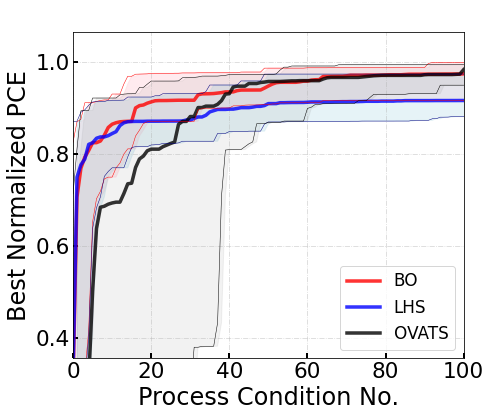

In [65]:
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes

# ax.plot(BO_reg_mean,'-', c = 'blue', linewidth=3.5,alpha = 0.8)
# ax.plot(BO_wInitCons_mean,'-', c = 'darkgreen', linewidth=3.5,alpha = 0.8)
# ax.plot(LHS_full_mean,'-', c = 'red', linewidth=3.5,alpha = 0.8)
# ax.plot(pGrid_mean,'-', c = 'black', linewidth=3.5,alpha = 0.8)
# ax.plot(OVAT_mean,'-', c = 'olive', linewidth=3.5,alpha = 0.8)


ax.plot(BO_reg_50perc,'-', c = 'red', linewidth=3.5,alpha = 0.8)
#ax.plot(BO_wInitCons_50perc,'-', c = 'darkgreen', linewidth=3.5,alpha = 0.8)
ax.plot(LHS_full_50perc,'-', c = 'blue', linewidth=3.5,alpha = 0.8)
#ax.plot(pGrid_50perc,'-', c = 'black', linewidth=3.5,alpha = 0.8)
ax.plot(OVAT_50perc,'-', c = 'black', linewidth=3.5,alpha = 0.8)


ax.fill_between(np.arange(len(BO_reg_5perc))+1, BO_reg_5perc, BO_reg_95perc, alpha = 0.3, color = 'pink')
ax.plot(BO_reg_5perc,'-', c = 'red', linewidth=0.5)
ax.plot(BO_reg_95perc,'-', c = 'red', linewidth=0.5)

#ax.fill_between(np.arange(len(BO_wInitCons_5perc))+1, BO_wInitCons_5perc, BO_wInitCons_95perc, alpha = 0.1, color = 'green')
#ax.plot(BO_wInitCons_5perc,'--', c = 'darkgreen', linewidth=0.5)
#ax.plot(BO_wInitCons_95perc,'--', c = 'darkgreen', linewidth=0.5)

ax.fill_between(np.arange(len(LHS_full_5perc))+1, LHS_full_5perc, LHS_full_95perc, alpha = 0.3, color = 'lightblue')
ax.plot(LHS_full_5perc,'-', c = 'navy', linewidth=0.5)
ax.plot(LHS_full_95perc,'-', c = 'navy', linewidth=0.5)

#ax.fill_between(np.arange(len(pGrid_5perc))+1, pGrid_5perc, pGrid_95perc, alpha = 0.1, color = 'gray')
#ax.plot(pGrid_5perc,'--', c = 'black', linewidth=0.5)
#ax.plot(pGrid_95perc,'--', c = 'black', linewidth=0.5)

ax.fill_between(np.arange(len(OVAT_5perc))+1, OVAT_5perc, OVAT_95perc, alpha = 0.1, color = 'gray')
ax.plot(OVAT_5perc,'-', c = 'black', linewidth=0.5)
ax.plot(OVAT_95perc,'-', c = 'black', linewidth=0.5)


axes.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(4./y_opt,12/y_opt)
axes.set_xscale('linear')
axes.set_xlim(0,100)
#axes.set_xticks([5, 10,20,50,100])

axes.grid(True, linestyle='-.')
axes.set_ylabel('Best Normalized PCE', fontsize = fs)
axes.set_xlabel('Process Condition No.', fontsize = fs)
axes.set_title(' ', fontsize = fs)
# axes.legend(['Regular BO',
#              'BO w. Cons.', 
#              'Latin Hyper. Sampl.', 
#              'Fact. Sampl. w. PGS',
#              'One Var. at a Time'
#             ],loc='lower right',fontsize = fs*0.8)

axes.legend(['BO', 
             'LHS', 
             'OVATS'
            ],loc='lower right',fontsize = fs*0.7)


plt.show()

### PCE histogram

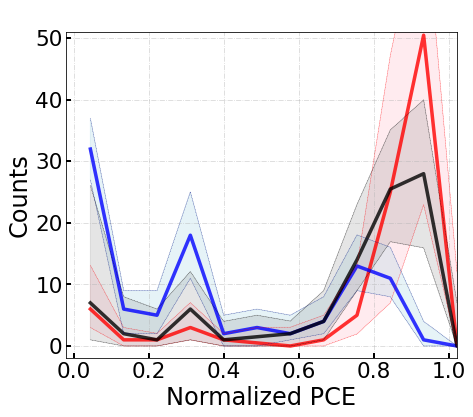

In [67]:
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
norm_eff = (x_norm-min(x_norm))/(max(x_norm)-min(x_norm))

ax.plot(x_norm, BO_hist100_50perc, '-', color = 'red', linewidth = 3.5, alpha = 0.8, label = 'Regular BO') 
#ax.plot(norm_eff, BOwCons_hist100_50perc, '-', color = 'darkgreen', linewidth = 3.5,  alpha = 0.8, label = 'BO w. Cons.') 
ax.plot(x_norm, LHS_hist100_50perc, '-', color = 'blue', linewidth = 3.5,  alpha = 0.8, label = 'LHS') 
#ax.plot(norm_eff, pGrid_hist100_50perc, '-', color = 'black', linewidth = 3.5,  alpha = 0.8, label = 'Fact. Sampl. w. PGS') 
ax.plot(x_norm, OVAT_hist100_50perc, '-', color = 'black', linewidth = 3.5,  alpha = 0.8, label = 'OVAT') 


#ax.scatter(x_norm, distr_median, color = 'olive') 
ax.fill_between(x_norm, BO_hist100_5perc, BO_hist100_95perc, alpha = 0.3, color = 'pink')
ax.plot(x_norm, BO_hist100_95perc, '--', color = 'red', linewidth=0.3) 
ax.plot(x_norm, BO_hist100_5perc, '--', color = 'red', linewidth=0.3) 


#ax.fill_between(norm_eff, BOwCons_hist100_5perc, BOwCons_hist100_95perc, alpha = 0.1, color = 'lightgreen')
#ax.plot(norm_eff, BOwCons_hist100_95perc, '--', color = 'darkgreen', linewidth=0.3) 
#ax.plot(norm_eff, BOwCons_hist100_5perc, '--', color = 'darkgreen', linewidth=0.3) 

ax.fill_between(x_norm, LHS_hist100_5perc, LHS_hist100_95perc, alpha = 0., color = 'lightblue')
ax.plot(x_norm, LHS_hist100_95perc, '--', color = 'navy', linewidth=0.3) 
ax.plot(x_norm, LHS_hist100_5perc, '--', color = 'navy', linewidth=0.3) 


#ax.fill_between(norm_eff, pGrid_hist100_5perc, pGrid_hist100_95perc, alpha = 0.1, color = 'darkgray')
#ax.plot(norm_eff, pGrid_hist100_95perc, '--', color = 'black', linewidth=0.3) 
#ax.plot(norm_eff, pGrid_hist100_5perc, '--', color = 'black', linewidth=0.3) 

ax.fill_between(x_norm, OVAT_hist100_5perc, OVAT_hist100_95perc, alpha = 0.2, color = 'grey')
ax.plot(x_norm, OVAT_hist100_95perc, '--', color = 'black', linewidth=0.3) 
ax.plot(x_norm, OVAT_hist100_5perc, '--', color = 'black', linewidth=0.3) 



ax.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
#ax.set_ylim(10.5/max_eff,17.8/max_eff)
#ax.set_xlim(0,300)
ax.grid(True, linestyle='-.')
ax.set_xlabel('Normalized PCE', fontsize = fs)
ax.set_ylabel('Counts', fontsize = fs)
ax.set_ylim(-0.02*100, 0.51*100)
ax.set_yticks(np.arange(6)*10)
ax.set_xlim(-0.02, 1.02)

ax.set_title(' ', fontsize = fs)
# ax.legend(['Regular BO',
#              'BO w. Cons.', 
#              'Latin Hyper. Sampl.', 
#              'Fact. Sampl. w. PGS',
#              'One Var. at a Time'
#             ],loc='upper left',fontsize = fs*0.7)
plt.show()


In [69]:
print(BO_hist100_50perc)
print(OVAT_hist100_50perc)
print(LHS_hist100_50perc)

[ 6.   1.   1.   3.   1.   0.5  0.   1.   5.  25.  50.5  0.   0.   0.
  0.   0.   0.   0. ]
[ 7.   2.   1.   6.   1.   1.5  2.   4.  14.  25.5 28.   0.   0.   0.
  0.   0.   0.   0. ]
[32.  6.  5. 18.  2.  3.  2.  4. 13. 11.  1.  0.  0.  0.  0.  0.  0.  0.]


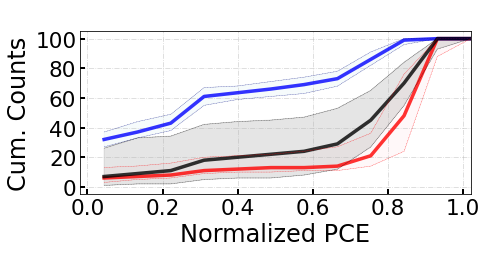

In [60]:
fs = 24
fig,axes = plt.subplots(1, 1, figsize=(7, 3), sharex = True)
ax = axes
norm_eff = (x_norm-min(x_norm))/(max(x_norm)-min(x_norm))

ax.plot(x_norm, BO_cum100_50perc, '-', color = 'red', linewidth = 3.5, alpha = 0.8, label = 'Regular BO') 
#ax.plot(norm_eff, BOwCons_cum100_50perc, '-', color = 'darkgreen', linewidth = 3.5,  alpha = 0.8, label = 'BO w. Cons.') 
ax.plot(x_norm, LHS_cum100_50perc, '-', color = 'blue', linewidth = 3.5,  alpha = 0.8, label = 'Latin Hyper. Sampl.') 
#ax.plot(norm_eff, pGrid_cum100_50perc, '-', color = 'black', linewidth = 3.5,  alpha = 0.8, label = 'Fact. Sampl. w. PGS') 
ax.plot(x_norm, OVAT_cum100_50perc, '-', color = 'black', linewidth = 3.5,  alpha = 0.8, label = 'One Var. at a Time') 


#ax.scatter(x_norm, distr_median, color = 'olive') 
ax.fill_between(x_norm, BO_cum100_5perc, BO_cum100_95perc, alpha = 0.3, color = 'pink')
ax.plot(x_norm, BO_cum100_95perc, '--', color = 'red', linewidth=0.3) 
ax.plot(x_norm, BO_cum100_5perc, '--', color = 'red', linewidth=0.3) 


#ax.fill_between(norm_eff, BOwCons_cum100_5perc, BOwCons_cum100_95perc, alpha = 0.1, color = 'lightgreen')
#ax.plot(norm_eff, BOwCons_cum100_95perc, '--', color = 'darkgreen', linewidth=0.3) 
#ax.plot(norm_eff, BOwCons_cum100_5perc, '--', color = 'darkgreen', linewidth=0.3) 

ax.fill_between(x_norm, LHS_cum100_5perc, LHS_cum100_95perc, alpha = 0.3, color = 'lightblue')
ax.plot(x_norm, LHS_cum100_95perc, '--', color = 'navy', linewidth=0.3) 
ax.plot(x_norm, LHS_cum100_5perc, '--', color = 'navy', linewidth=0.3) 


#ax.fill_between(norm_eff, pGrid_cum100_5perc, pGrid_cum100_95perc, alpha = 0.1, color = 'darkgray')
#ax.plot(norm_eff, pGrid_cum100_95perc, '--', color = 'black', linewidth=0.3) 
#ax.plot(norm_eff, pGrid_cum100_5perc, '--', color = 'black', linewidth=0.3) 

ax.fill_between(x_norm, OVAT_cum100_5perc, OVAT_cum100_95perc, alpha = 0.2, color = 'grey')
ax.plot(x_norm, OVAT_cum100_95perc, '--', color = 'black', linewidth=0.3) 
ax.plot(x_norm, OVAT_cum100_5perc, '--', color = 'black', linewidth=0.3) 



ax.tick_params(direction='in', length=5, width=2, labelsize = fs*.9, grid_alpha = 0.5)
#ax.set_ylim(10.5/max_eff,17.8/max_eff)
#ax.set_xlim(0,300)
ax.grid(True, linestyle='-.')
ax.set_xlabel('Normalized PCE', fontsize = fs)
ax.set_ylabel('Cum. Counts', fontsize = fs)
ax.set_ylim(-.05*100, 1.05*100)
ax.set_yticks(np.arange(6)*20)
ax.set_xlim(-0.02, 1.02)

ax.set_title(' ', fontsize = fs)
# ax.legend(['Regular BO',
#              'BO w. Cons.', 
#              'Latin Hyper. Sampl.', 
#              'Fact. Sampl. w. PGS',
#              'One Var. at a Time'
#             ],loc='upper left',fontsize = fs*0.7)
plt.show()